In [1]:
from pytriqs.gf import *
import numpy as np

a = 5
beta = 500.0
n_iw = 5000
iw_mesh = MeshImFreq(beta, 'Fermion', n_iw)

g = Gf(mesh=iw_mesh, target_shape=[2,2])
g  << inverse(iOmega_n - a) + inverse(iOmega_n + 2*a)

omax = (2*n_iw + 1)*3.1416/beta/(2*a)
print "omax", omax

omax 6.28382832


/Users/parcolle/triqs_install/lib/python2.7/site-packages/pytriqs/gf/plot/plot_base.py:44: UserWarning: oplot of gf : no name provided !
  warn("oplot of gf : no name provided !")


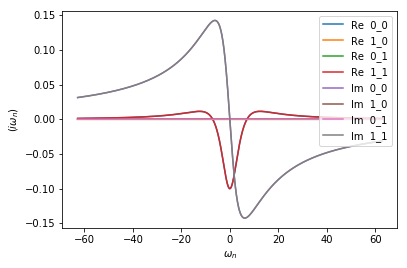

In [2]:
from pytriqs.plot.mpl_interface import *
%matplotlib inline
oplot(g)

In [3]:
def eval_tail(g):
    mytail, err  = g.get_tail()
    def f(omega):
        z = 1.
        res = np.zeros(mytail.shape[1:], dtype='complex128')
        for n in range(mytail.shape[0]):
            res[:] += mytail[n,:] * z
            z = z / omega
        return res
    return f

In [4]:
print g.get_tail()[1]

2.05177256759e-08


<function matplotlib.pyplot.show>

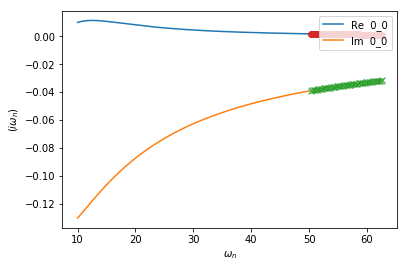

In [5]:
g_tail = eval_tail(g)

x_points = np.array([x.value for x in g.mesh][ -int(n_iw *(0.2)):-1:20])
y_points = np.array([g_tail(x,)[0,0] for x in x_points])

#print x_points
#print y_points 
oplot(g[0,0], x_window=(10,50))
plt.plot(x_points.imag, y_points.imag, 'x')
plt.plot(x_points.imag, y_points.real, 'o')
plt.show

In [6]:
def analy(n):
    return (a)**(n-1) + (-2*a)**(n-1)
for n,x in enumerate(g.get_tail()[0][:,0,0].real):
    print x/(analy(n))

3.96037997402e-07
0.999999777416
0.999920167652
0.999965001765
0.998249094092
0.998459214643
0.97085068326
0.970994636344
0.742192195164
0.739882094635


In [7]:
def f(Nw) :
    iw_mesh = MeshImFreq(beta, 'Fermion', Nw)
    g = Gf(mesh=iw_mesh, target_shape=[2,2])
    g  << inverse(iOmega_n - a) + inverse(iOmega_n + 2*a)
    return g.get_tail()[0][:,0,0].real 

In [8]:
%%timeit
f(5000)

1 loop, best of 3: 12 s per loop


In [9]:
X = np.arange(1000, 10000, 500)

X = np.arange(1000, 6000, 500)

Xp = [((2*n + 1)*3.1416/beta)/(2*a) for n in X]

d = [f(x) for x in X]
def g(n):
    return [dd[n]/analy(n) for dd in d]

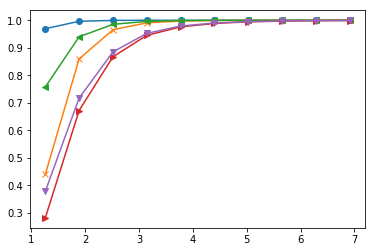

In [10]:
plt.plot(Xp, g(1), '-o')
plt.plot(Xp, g(2), '-x')
plt.plot(Xp, g(3), '-<')
plt.plot(Xp, g(4), '->')
plt.plot(Xp, g(5), '-v')
#plt.plot(Xp, g(6), '-*')

In [11]:
zip(Xp,g(2))

[(1.2572683200000001, 0.43970356232816421),
 (1.8855883200000001, 0.85964011586853029),
 (2.5139083200000001, 0.96540334855137933),
 (3.1422283200000001, 0.99049708563115479),
 (3.7705483200000005, 0.99703231449616436),
 (4.3988683200000001, 0.99895585892636007),
 (5.0271883199999996, 0.99959251411564998),
 (5.65550832, 0.99982628522447059),
 (6.2838283199999996, 0.99992016765237568),
 (6.91214832, 0.99996088389671023)]